<a href="https://colab.research.google.com/github/mu132/mu132/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# vasl colab be google drive

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn 

## read csv
df = pd.read_csv('drive/My Drive/EURUSD15.csv') # adres dataset az google drive ro inja benevisid
df.head(5)
data = df
data.head(5)

,1.1905,1.19054,1.19014,1.19034,837
0,1.19033,1.19039,1.18977,1.19023,1172
1,1.19024,1.19035,1.18969,1.18998,1032
2,1.18998,1.19016,1.18973,1.18991,1090
3,1.18993,1.19021,1.18966,1.18988,830
4,1.18987,1.19006,1.18984,1.18988,950


Split Training and Testing Data

In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data)
data_np = df.to_numpy()

In [4]:
data_np.shape[0]/2

9162.5

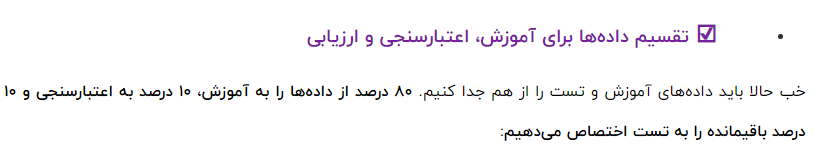

In [5]:
n1 = int(data_np.shape[0] * 0.8)
n2 = int((data_np.shape[0] - n1)/2)
x_train = data_np[:n1]
x_val = data_np[n1: n1 + n2]
x_test = data_np[n1 + n2:]

In [6]:
n2

1832

In [7]:
x_train.shape

(14660, 5)

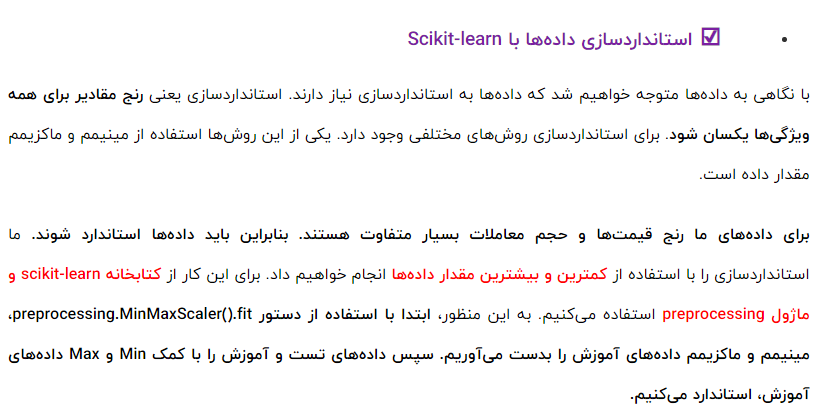

In [8]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x_train)
x_train_n = minmax_scale.transform(x_train)
x_val_n = minmax_scale.transform(x_val)
x_test_n = minmax_scale.transform(x_test)

In [9]:
x_train_n.shape

(14660, 5)

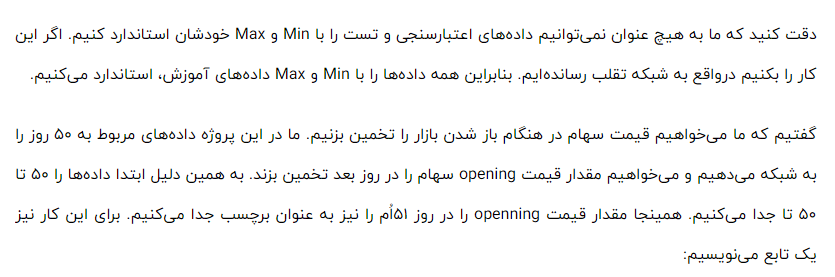

In [10]:
def slicing_50(x, history_points):
    sliced_data = np.array([x[i  : i + history_points] for i in range(len(x) - history_points)])
    labels = np.array([x[:,0][i + history_points] for i in range(len(x) - history_points)])
    return sliced_data, labels

In [11]:
x_train_n.shape

(14660, 5)

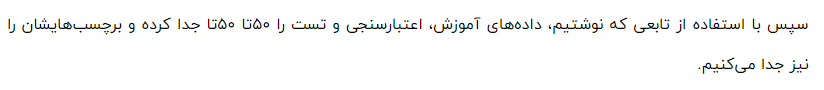

In [12]:
history_points = 50
x_train_n, y_train = slicing_50(x_train_n, history_points)
x_val_n, y_val = slicing_50(x_val_n, history_points)
x_test_n, y_test = slicing_50(x_test_n, history_points)

In [13]:
x_train_n

array([[[0.55979457, 0.55878049, 0.55618184, 0.55904262, 0.190259  ],
        [0.55869406, 0.55829268, 0.55520157, 0.55598974, 0.16745398],
        [0.5555148 , 0.55597561, 0.5556917 , 0.55513494, 0.17690178],
        ...,
        [0.58694057, 0.595     , 0.58264919, 0.58493101, 0.46554813],
        [0.58437271, 0.59621951, 0.58657027, 0.59555501, 0.41896074],
        [0.59525556, 0.60012195, 0.5913491 , 0.59470021, 0.31063691]],

       [[0.55869406, 0.55829268, 0.55520157, 0.55598974, 0.16745398],
        [0.5555148 , 0.55597561, 0.5556917 , 0.55513494, 0.17690178],
        [0.5549034 , 0.55658537, 0.55483397, 0.55476859, 0.1345496 ],
        ...,
        [0.58437271, 0.59621951, 0.58657027, 0.59555501, 0.41896074],
        [0.59525556, 0.60012195, 0.5913491 , 0.59470021, 0.31063691],
        [0.59415505, 0.60231707, 0.59723073, 0.60288191, 0.34191236]],

       [[0.5555148 , 0.55597561, 0.5556917 , 0.55513494, 0.17690178],
        [0.5549034 , 0.55658537, 0.55483397, 0.55476859, 0.1

د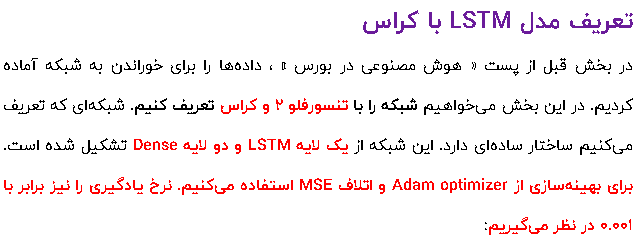

In [14]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
np.random.seed(4)
tf.random.set_seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = tf.optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


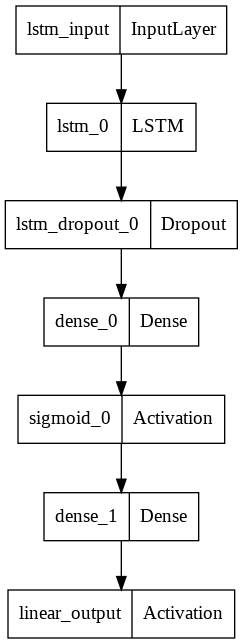

In [15]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
plot_model(model)

In [16]:


from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('./stocks_price.h5', save_best_only=True, monitor='val_loss', mode='min')


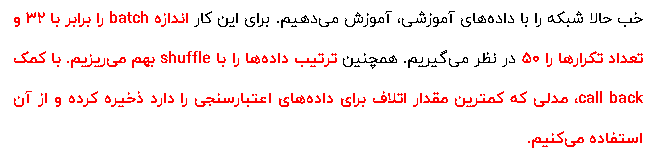

In [17]:
history = model.fit(x=x_train_n, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_val_n, y_val), callbacks=[mcp_save])

Epoch 1/50
457/457 [==============================] - 13s 15ms/step - loss: 0.0037 - val_loss: 0.0091
Epoch 2/50
457/457 [==============================] - 6s 14ms/step - loss: 6.8818e-04 - val_loss: 0.0032
Epoch 3/50
457/457 [==============================] - 6s 14ms/step - loss: 5.6209e-04 - val_loss: 0.0019
Epoch 4/50
457/457 [==============================] - 6s 14ms/step - loss: 5.1135e-04 - val_loss: 0.0014
Epoch 5/50
457/457 [==============================] - 6s 14ms/step - loss: 4.9550e-04 - val_loss: 4.4708e-04
Epoch 6/50
457/457 [==============================] - 6s 14ms/step - loss: 4.7071e-04 - val_loss: 0.0013
Epoch 7/50
457/457 [==============================] - 6s 13ms/step - loss: 4.4985e-04 - val_loss: 9.8488e-04
Epoch 8/50
457/457 [==============================] - 6s 14ms/step - loss: 4.2032e-04 - val_loss: 7.1762e-04
Epoch 9/50
457/457 [==============================] - 6s 13ms/step - loss: 4.4801e-04 - val_loss: 0.0025
Epoch 10/50
457/457 [=========================

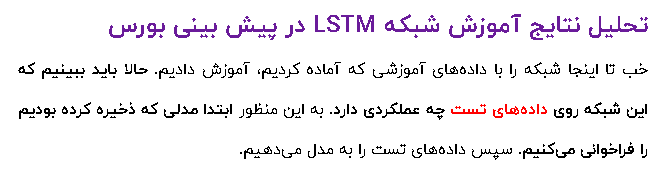

In [18]:
model.load_weights('./stocks_price.h5')
evaluation = model.evaluate(x_test_n, y_test)
print(evaluation)

56/56 [==============================] - 0s 6ms/step - loss: 1.3956e-05
1.395619437971618e-05


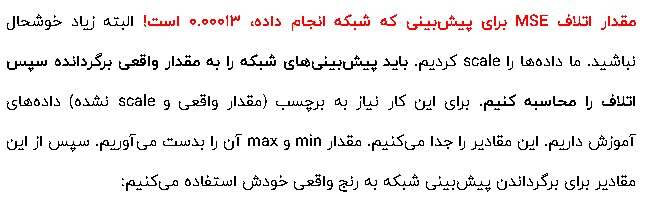

In [19]:
y_train_real = np.array([x_train[:,0][i + history_points] for i in range(len(x_train) - history_points)])
scale_back = preprocessing.MinMaxScaler().fit(np.expand_dims(y_train_real, -1))

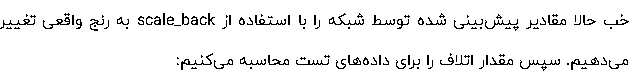

In [20]:
y_test_predicted = model.predict(x_test_n)

In [21]:
y_test_predicted = scale_back.inverse_transform(y_test_predicted)
y_test_real = np.array([x_test[:,0][i + history_points] for i in range(len(x_test) - history_points)])
real_mse = np.square(np.mean(y_test_real - y_test_predicted))
print(real_mse)

2.9038200450875936e-11


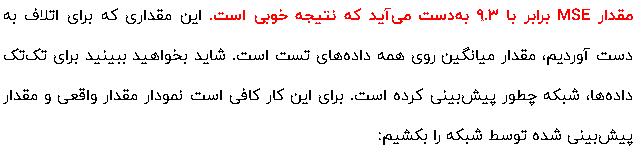

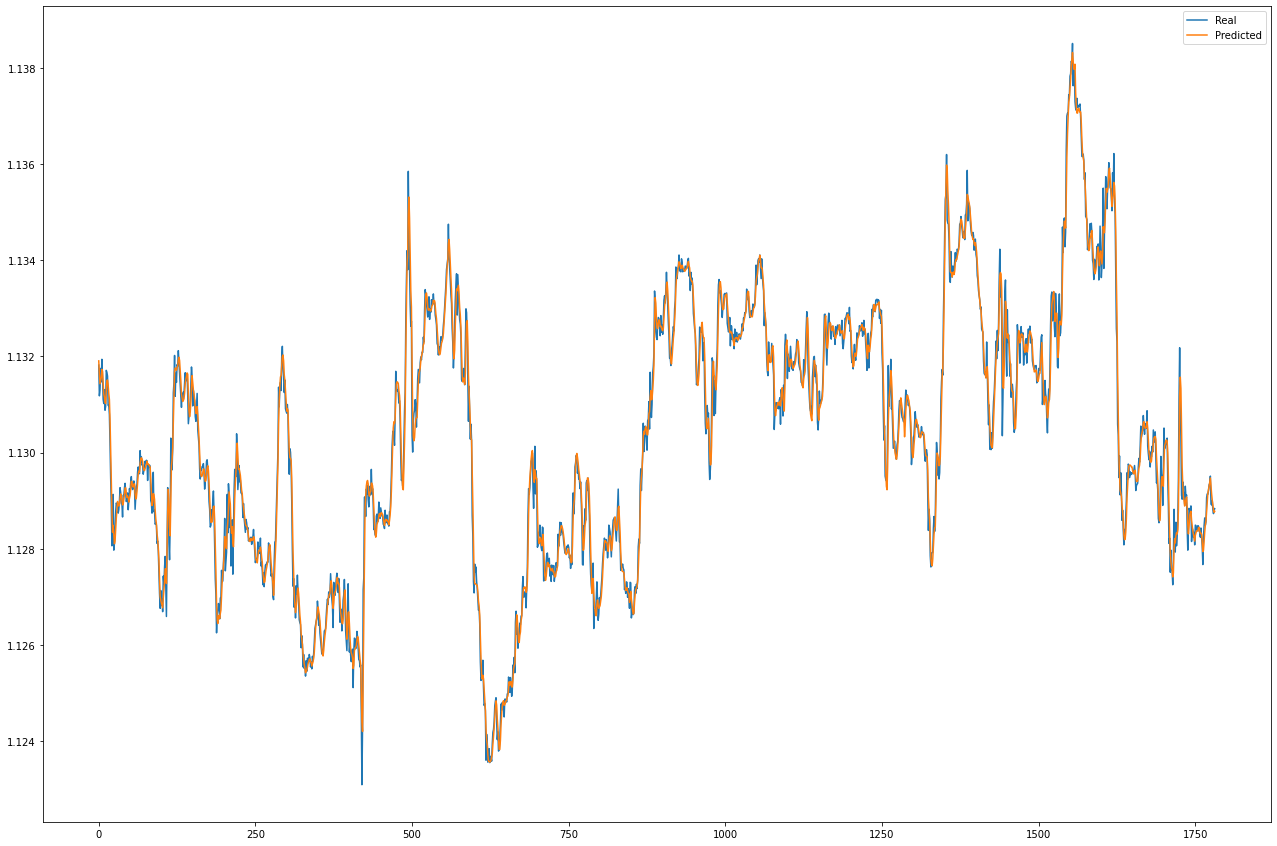

In [22]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(y_test_real[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

Split Training and Testing Data

In [23]:
import pandas as pd
import numpy as np
import sklearn 

## read csv
df = pd.read_csv('drive/My Drive/EURUSD5_OPEN.csv') # adres dataset az google drive ro inja benevisid
df.head(5)


,1.21256,1.21256.1,1.21256.2,1.21256.3,388
0,1.21247,1.21247,1.21247,1.21247,366
1,1.21267,1.21267,1.21267,1.21267,256
2,1.21282,1.21282,1.21282,1.21282,251
3,1.21274,1.21274,1.21274,1.21274,334
4,1.21282,1.21282,1.21282,1.21282,361


In [24]:
import numpy as np
import pandas as pd
df = pd.DataFrame(df)
data_np = df.to_numpy()

In [25]:
n1 = int(data_np.shape[0] * 0.8)
n2 = int((data_np.shape[0] - n1)/2)
x_train = data_np[:n1]
x_val = data_np[n1: n1 + n2]
x_test = data_np[n1 + n2:]

برای داده‌های ما رنج قیمت‌ها و حجم معاملات بسیار متفاوت هستند. بنابراین باید داده‌ها استاندارد شوند. ما استانداردسازی را با استفاده از کمترین و بیشترین مقدار داده‌ها انجام خواهیم داد.

In [26]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x_train)
x_train_n = minmax_scale.transform(x_train)
x_val_n = minmax_scale.transform(x_val)
x_test_n = minmax_scale.transform(x_test)

In [27]:
x_train_n.shape

(31135, 5)

می‌خواهیم قیمت سهام در هنگام باز شدن بازار را تخمین بزنیم. ما در این پروژه داده‌های مربوط به 50 روز را به شبکه می‌دهیم و می‌خواهیم مقدار قیمت باز شدن سهام را در روز بعد تخمین بزند. به همین دلیل ابتدا داده‌ها را 50 تا 50 تا جدا می‌کنیم. همینجا مقدار قیمت باز شدن را در روز 51اُم را نیز به عنوان برچسب جدا می‌کنیم.

In [28]:
def slicing_50(x, history_points):
    sliced_data = np.array([x[i  : i + history_points] for i in range(len(x) - history_points)])
    labels = np.array([x[:,0][i + history_points] for i in range(len(x) - history_points)])
    return sliced_data, labels

 با استفاده از تابعی که نوشتیم، داده‌های آموزش، اعتبارسنجی و تست را 50تا 50تا جدا کرده و برچسب‌هایشان را نیز جدا می‌کنیم.

In [29]:
history_points = 50
x_train_n, y_train = slicing_50(x_train_n, history_points)
x_val_n, y_val = slicing_50(x_val_n, history_points)
x_test_n, y_test = slicing_50(x_test_n, history_points)

د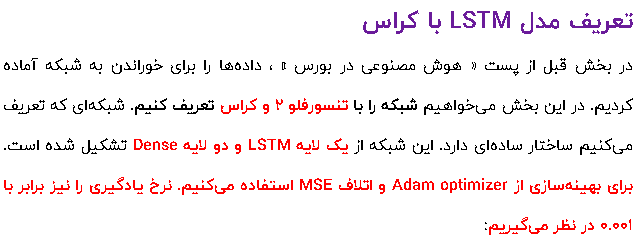

In [30]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
np.random.seed(4)
tf.random.set_seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = tf.optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


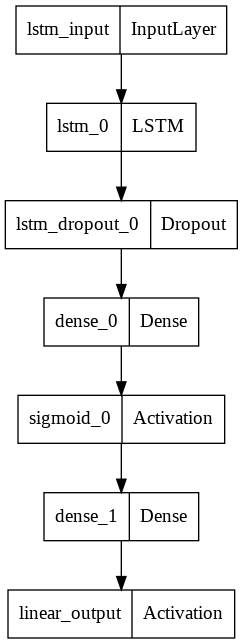

In [31]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
plot_model(model)

In [32]:


from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('./stocks_price.h5', save_best_only=True, monitor='val_loss', mode='min')


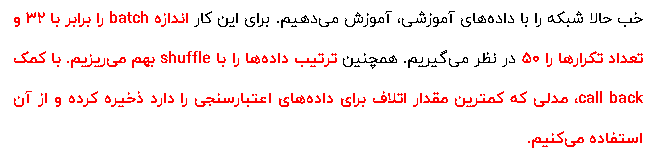

In [33]:
#history = model.fit(x=x_train_n, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_val_n, y_val), callbacks=[mcp_save])

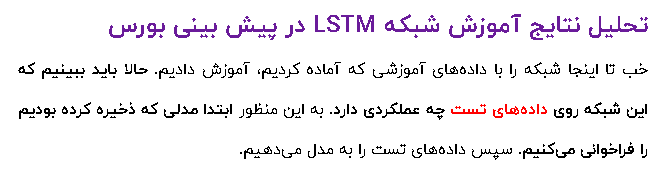

In [34]:
model.load_weights('./stocks_price.h5')
evaluation = model.evaluate(x_test_n, y_test)
print(evaluation)

121/121 [==============================] - 1s 6ms/step - loss: 1.6526e-05
1.6525955288670957e-05


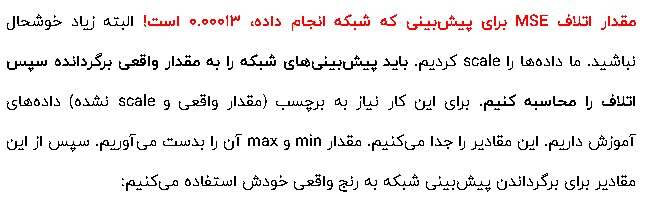

In [35]:
y_train_real = np.array([x_train[:,0][i + history_points] for i in range(len(x_train) - history_points)])
scale_back = preprocessing.MinMaxScaler().fit(np.expand_dims(y_train_real, -1))

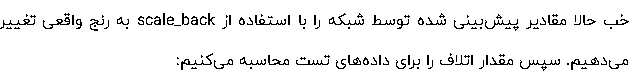

In [36]:
y_test_predicted = model.predict(x_test_n)
x_test_n.shape


(3842, 50, 5)

In [37]:
y_test_predicted = scale_back.inverse_transform(y_test_predicted)
y_test_real = np.array([x_test[:,0][i + history_points] for i in range(len(x_test) - history_points)])
real_mse = np.square(np.mean(y_test_real - y_test_predicted))
print(real_mse)

1.0408561404959019e-07


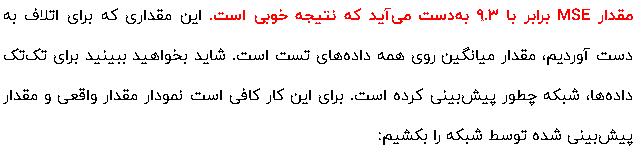

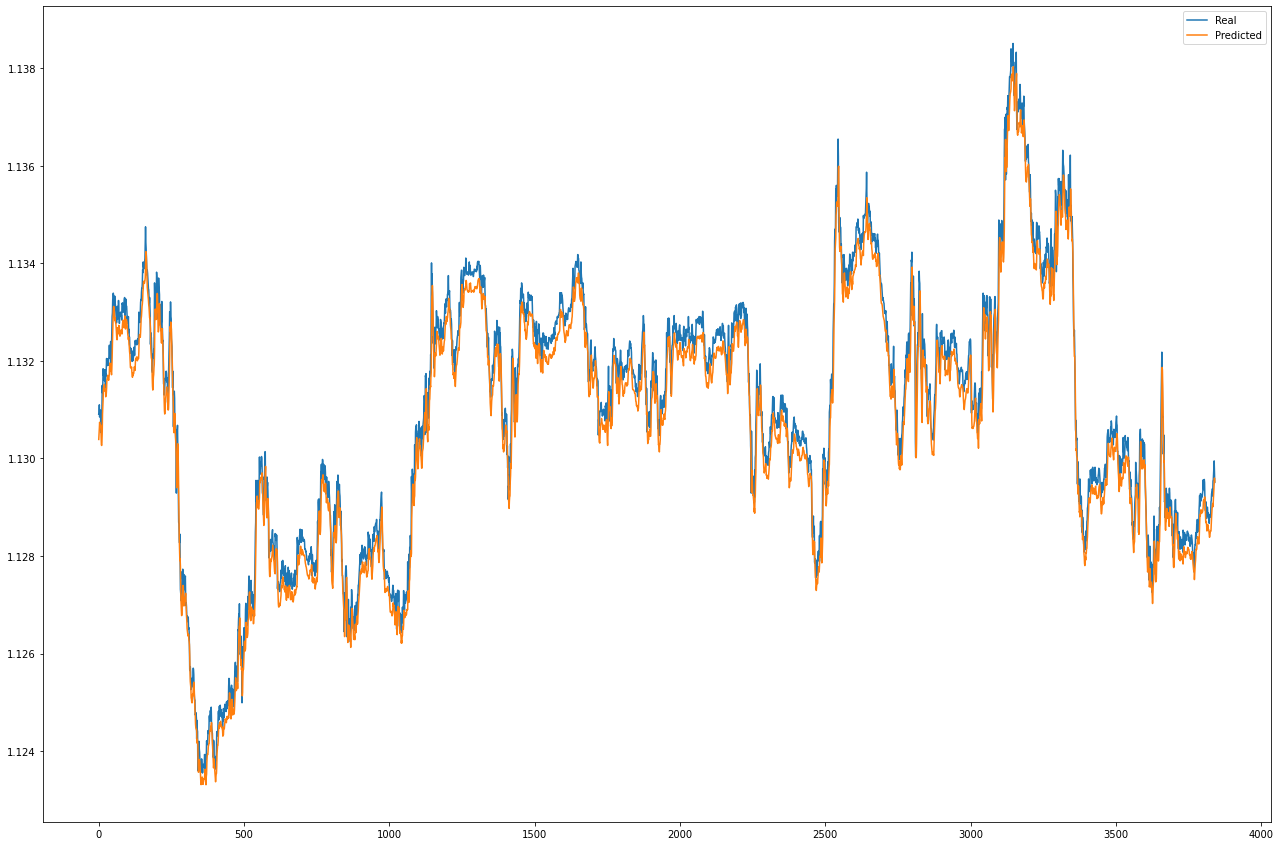

In [38]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(y_test_real[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

In [39]:
y_test_predicted


array([[1.13039  ],
       [1.1305267],
       [1.1306149],
       ...,
       [1.1295986],
       [1.1295193],
       [1.1293567]], dtype=float32)

In [40]:
y_test_predicted.shape

(3842, 1)

In [41]:
y_test_real

array([1.13091, 1.13093, 1.1311 , ..., 1.12969, 1.12951, 1.1295 ])

# **write to file**

In [42]:
import pandas as pd
y_open = y_test_predicted
cities = pd.DataFrame(y_open)
cities.to_csv('drive/My Drive/eur_open.csv', index=False, sep=';')

In [43]:
import pandas as pd
y_close = y_test_real
cities = pd.DataFrame(y_close)
cities.to_csv('drive/My Drive/eur_R_open.csv', index=False, sep=';')

## **Read Data**

In [44]:
import pandas as pd
import numpy as np
import sklearn 


df = pd.read_csv('drive/My Drive/EURUSD5_CLOSE.csv') # adres dataset az google drive ro inja benevisid
df.head(5)


,1.21245,1.21245.1,1.21245.2,1.21245.3,388
0,1.21267,1.21267,1.21267,1.21267,366
1,1.21281,1.21281,1.21281,1.21281,256
2,1.21272,1.21272,1.21272,1.21272,251
3,1.21281,1.21281,1.21281,1.21281,334
4,1.21269,1.21269,1.21269,1.21269,361


In [45]:
import numpy as np
import pandas as pd
df = pd.DataFrame(df)
data_np = df.to_numpy()

In [46]:
n1 = int(data_np.shape[0] * 0.8)
n2 = int((data_np.shape[0] - n1)/2)
x_train = data_np[:n1]
x_val = data_np[n1: n1 + n2]
x_test = data_np[n1 + n2:]

برای داده‌های ما رنج قیمت‌ها و حجم معاملات بسیار متفاوت هستند. بنابراین باید داده‌ها استاندارد شوند. ما استانداردسازی را با استفاده از کمترین و بیشترین مقدار داده‌ها انجام خواهیم داد.

In [47]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(x_train)
x_train_n = minmax_scale.transform(x_train)
x_val_n = minmax_scale.transform(x_val)
x_test_n = minmax_scale.transform(x_test)

In [48]:
x_train_n.shape

(31135, 5)

می‌خواهیم قیمت سهام در هنگام باز شدن بازار را تخمین بزنیم. ما در این پروژه داده‌های مربوط به 50 روز را به شبکه می‌دهیم و می‌خواهیم مقدار قیمت باز شدن سهام را در روز بعد تخمین بزند. به همین دلیل ابتدا داده‌ها را 50 تا 50 تا جدا می‌کنیم. همینجا مقدار قیمت باز شدن را در روز 51اُم را نیز به عنوان برچسب جدا می‌کنیم.

In [49]:
def slicing_50(x, history_points):
    sliced_data = np.array([x[i  : i + history_points] for i in range(len(x) - history_points)])
    labels = np.array([x[:,0][i + history_points] for i in range(len(x) - history_points)])
    return sliced_data, labels

 با استفاده از تابعی که نوشتیم، داده‌های آموزش، اعتبارسنجی و تست را 50تا 50تا جدا کرده و برچسب‌هایشان را نیز جدا می‌کنیم.

In [50]:
history_points = 50
x_train_n, y_train = slicing_50(x_train_n, history_points)
x_val_n, y_val = slicing_50(x_val_n, history_points)
x_test_n, y_test = slicing_50(x_test_n, history_points)

د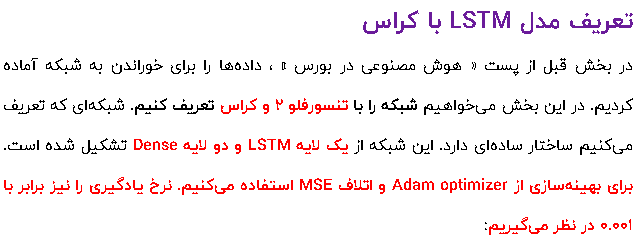

In [51]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
np.random.seed(4)
tf.random.set_seed(4)

lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = tf.optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:


from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('./stocks_price.h5', save_best_only=True, monitor='val_loss', mode='min')


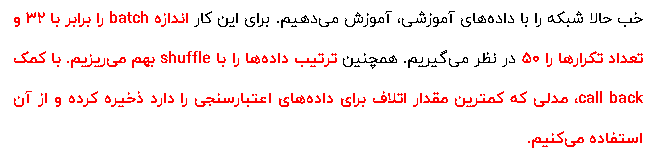

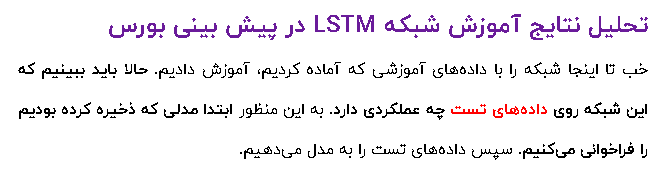

In [53]:
model.load_weights('./stocks_price.h5')
evaluation = model.evaluate(x_test_n, y_test)
print(evaluation)

121/121 [==============================] - 1s 6ms/step - loss: 1.6541e-05
1.6541484001209028e-05


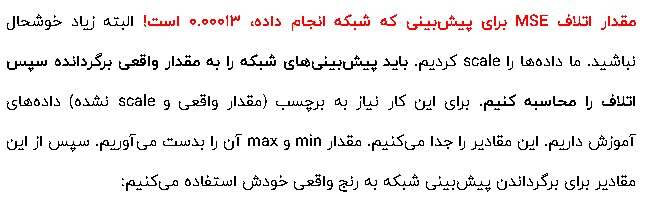

In [54]:
y_train_real = np.array([x_train[:,0][i + history_points] for i in range(len(x_train) - history_points)])
scale_back = preprocessing.MinMaxScaler().fit(np.expand_dims(y_train_real, -1))

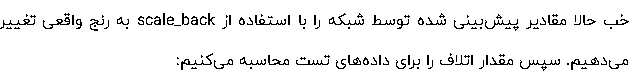

In [55]:
y_test_predicted = model.predict(x_test_n)
x_test_n.shape


(3842, 50, 5)

In [56]:
y_test_predicted = scale_back.inverse_transform(y_test_predicted)
y_test_real = np.array([x_test[:,0][i + history_points] for i in range(len(x_test) - history_points)])
real_mse = np.square(np.mean(y_test_real - y_test_predicted))
print(real_mse)

1.0377107351377645e-07


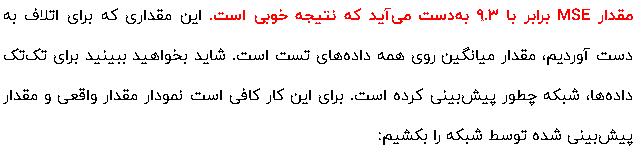

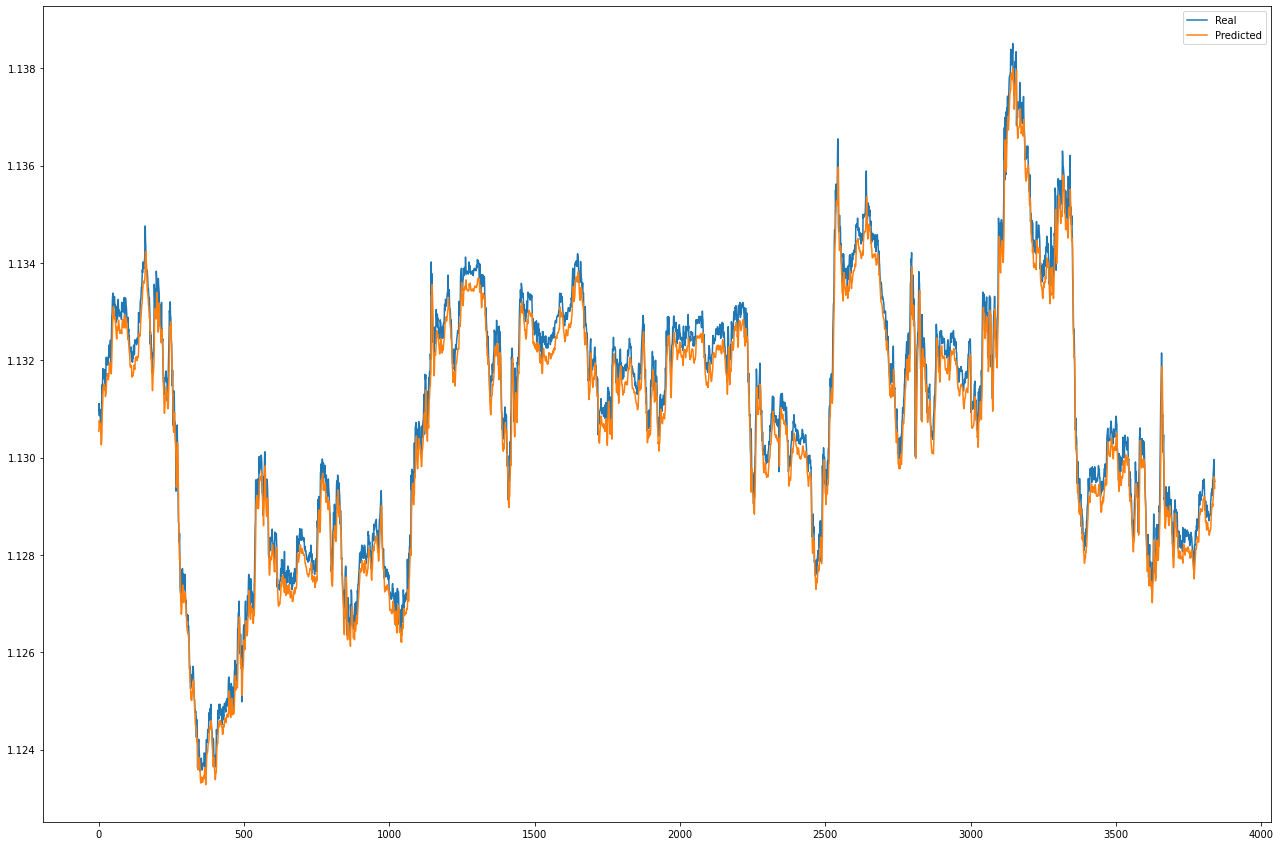

In [57]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(y_test_real[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()

write to file

In [58]:
import pandas as pd
y_close = y_test_predicted
cities = pd.DataFrame(y_close)
cities.to_csv('drive/My Drive/eur_close.csv', index=False, sep=';')

In [59]:
import pandas as pd
y_close = y_test_real
cities = pd.DataFrame(y_close)
cities.to_csv('drive/My Drive/eur_R_close.csv', index=False, sep=';')

In [60]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
predictions = clf.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [61]:
from sklearn.metrics import classification_report
print("Classification results without any parameter tuning or CV are\n")
print(classification_report(predictions, y_test, labels=[0,1]))
print

Classification results without any parameter tuning or CV are



ValueError: ignored

In [ ]:
x_train